# Описание работы
В работе мы будем использовать язык программирования python с сопутствующими ему библиотеки (sklearn, matplotlib, seaborn) и в качестве среды для работы jupyter notebook. Цель текущего поста - показать общие подходы к подготовке данных. То есть, те манипуляции, которые необходимо совершить перед загрузкой данных в модель машинного обучения. В идеальном мире у вас будет абсолютно чистый датасет без выбросов или пропущенных значений. Однако в реальном мире такие наборы данных встречаются крайне редко.
Далее будем рассматривать данные из Kaggle: "Mental Health in Tech Survey".

## Обзор датасета
Трудно работать с данными, не понимая, что они из себя представляют, поэтому давайте их загрузим и выведем некоторые статистики.

In [1]:
import pandas as pd 
import numpy as np 
df = pd.read_csv("survey.csv") 
df.head() 

,Timestamp,Age,Gender,Country,state,self_employed,family_history,treatment,work_interfere,no_employees,...,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,comments
0,2014-08-27 11:29:31,37,Female,United States,IL,NaN,No,Yes,Often,6-25,...,Somewhat easy,No,No,Some of them,Yes,No,Maybe,Yes,No,NaN
1,2014-08-27 11:29:37,44,M,United States,IN,NaN,No,No,Rarely,More than 1000,...,Don't know,Maybe,No,No,No,No,No,Don't know,No,NaN
2,2014-08-27 11:29:44,32,Male,Canada,NaN,NaN,No,No,Rarely,6-25,...,Somewhat difficult,No,No,Yes,Yes,Yes,Yes,No,No,NaN
3,2014-08-27 11:29:46,31,Male,United Kingdom,NaN,NaN,Yes,Yes,Often,26-100,...,Somewhat difficult,Yes,Yes,Some of them,No,Maybe,Maybe,No,Yes,NaN
4,2014-08-27 11:30:22,31,Male,United States,TX,NaN,No,No,Never,100-500,...,Don't know,No,No,Some of them,Yes,Yes,Yes,Don't know,No,NaN


Увидим нам первое представление о том, что есть наши данные. Далее, выполнив построчно код ниже, посмотрим на размеры наших табличных данных.

In [2]:
df.shape # мы увидим информацию о размерности нашего датафрейма 

(1259, 27)

In [3]:
df.info() # покажет информацию о размерности данных 
          # описание индекса, количество not-a-number элементов 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1259 entries, 0 to 1258
Data columns (total 27 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Timestamp                  1259 non-null   object
 1   Age                        1259 non-null   int64 
 2   Gender                     1259 non-null   object
 3   Country                    1259 non-null   object
 4   state                      744 non-null    object
 5   self_employed              1241 non-null   object
 6   family_history             1259 non-null   object
 7   treatment                  1259 non-null   object
 8   work_interfere             995 non-null    object
 9   no_employees               1259 non-null   object
 10  remote_work                1259 non-null   object
 11  tech_company               1259 non-null   object
 12  benefits                   1259 non-null   object
 13  care_options               1259 non-null   object
 14  wellness

In [4]:
df.describe() # показывает статистики count,mean, std, min, 25%-50%-75% percentile, max 

,Age
count,1.259000e+03
mean,7.942815e+07
std,2.818299e+09
min,-1.726000e+03
25%,2.700000e+01
50%,3.100000e+01
75%,3.600000e+01
max,1.000000e+11


In [5]:
df.nunique() # количество уникальных значений для каждого столбца 

Timestamp                    1246
Age                            53
Gender                         49
Country                        48
state                          45
self_employed                   2
family_history                  2
treatment                       2
work_interfere                  4
no_employees                    6
remote_work                     2
tech_company                    2
benefits                        3
care_options                    3
wellness_program                3
seek_help                       3
anonymity                       3
leave                           5
mental_health_consequence       3
phys_health_consequence         3
coworkers                       3
supervisor                      3
mental_health_interview         3
phys_health_interview           3
mental_vs_physical              3
obs_consequence                 2
comments                      160
dtype: int64

Посмотрим информацию о количестве каждого уникального значения для каждого столбца в наборе данных:

In [6]:
feature_names = df.columns.tolist() 
for column in feature_names: 
    print(column )
    print(df[column].value_counts(dropna=False))

Timestamp
2014-08-27 12:44:51    2
2014-08-27 14:22:43    2
2014-08-27 12:31:41    2
2014-08-28 16:52:34    2
2014-08-27 17:33:52    2
                      ..
2014-08-27 15:35:21    1
2014-08-27 15:34:32    1
2014-08-27 15:34:31    1
2014-08-27 15:34:23    1
2016-02-01 23:04:31    1
Name: Timestamp, Length: 1246, dtype: int64
Age
 29             85
 32             82
 26             75
 27             71
 33             70
 28             68
 31             67
 34             65
 30             63
 25             61
 35             55
 23             51
 24             46
 37             43
 38             39
 36             37
 40             33
 39             33
 43             28
 22             21
 41             21
 42             20
 21             16
 45             12
 46             12
 44             11
 19              9
 18              7
 48              6
 50              6
 20              6
 51              5
 49              4
 56              4
 57              3
 5

Большинство столбцов выглядят хорошо, но есть несколько нуждающихся в очистке. Примеры некорректных значений данных ниже.
- Столбец «age» содержит людей, которые еще не родились (отрицательные числа).
- Столбец «age» содержит детей (например, 5-летнего возраста), которые вряд ли будут проводить опрос о своем рабочем месте.
- Столбец «age» содержит возраст в 99999999999 лет
- Существует 49 различных значений для «gender». Для примера, «Male» и «male» обозначают одно и то же, но в рассматриваются как две разные категории.
- self_employed и work_interfere содержат несколько пропущенных полей.

## Разделение на обучающую выборку и целевую переменную
Так как мы сейчас рассматриваем задачу обучения с учителем (несколько сублимированную - сами придумали, сами решаем), нам необходимо разделить на признаки для обучения и на признаки для предсказания. Целевая переменная для текущего датасета зависит от ваших целей. Для примера: вы можете, базируясь на этом наборе данных решать классификационную задачу (определять пол опрашиваемого) или же регрессионную (предсказывать возраст опрашиваемого).  Для дальнейшего рассмотрения была взята классификационная задача: будет ли опрашиваемая персона искать лечение.

In [7]:
features = df.drop('treatment', 1) 
labels = df['treatment'] 

C:\Users\acer\AppData\Local\Temp\ipykernel_10444\1330750697.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  features = df.drop('treatment', 1)


## Обработка пропусков в данных
Зачастую не существует шаблонных подходов к этой задаче, поскольку подходы во многом зависит от контекста и характера данных. Например, являются ли данные случайными пропусками или же есть скрытая связь между пропусками и некоторым другим записями в обучающем примере?
Один из способов простых способов решения этой проблемы - просто игнорировать или удалять строки, в которых отсутствуют данные, выбрасывая их из нашего анализа. Однако этот метод может быть плох из-за потери информации.
Еще один способ — это заполнение пропусков, где мы заменяем отсутствующее значение каким-либо образом. Базовые реализации просто заменят все отсутствующие значения средним, медианным, либо же константой.
Для начала выясним, что делать с пропущенными значениями, найденными в self_employed и work_interfere. В обоих случаях столбец содержит категориальные данные.
Возьмем следующий пример, который представляет собой небольшой набор данных, содержащий три признака (погодное условие, температуру и влажность), чтобы предсказать, могу ли я играть в теннис или нет.

id	weather	temperature	humidity	play tennis?
1	cloudy	60	NaN	yes
2	rainy	75	80%	NaN
3	cloudy	NaN	50%	no
4	sunny	65	40%	yes
Если бы мы удалили все строки с отсутствующими значениями, осталась бы только одна строка, и наш предиктор всегда бы предполагал, что я должен играть в теннис, так как других вариантов, по которым он будет учиться, про не будет. Предположим, мы вместо этого решили заменить нулевое значение температуры в строке 3 средним. В этом случае температура строки 3 искусственно сообщалась бы равной 65.  И это уже позволит при каких-то входных параметрах получать от алгоритма отрицательный результат.

Scikit-learn предоставляет реализацию для обработки пропусков

In [8]:
from sklearn.impute import SimpleImputer
imp = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
imp.fit(features)
features = imp.transform(features)
print(features)
#from sklearn.preprocessing import Imputer 

#imputer = Imputer(missing_values = 'NaN', strategy = 'mean', axis = 0) 
#imputer.fit(features)  
#features = imputer.transform(features) 

[['2014-08-27 11:29:31' 37 'Female' ... 'Yes' 'No'
  '* Small family business - YMMV.']
 ['2014-08-27 11:29:37' 44 'M' ... "Don't know" 'No'
  '* Small family business - YMMV.']
 ['2014-08-27 11:29:44' 32 'Male' ... 'No' 'No'
  '* Small family business - YMMV.']
 ...
 ['2015-11-07 12:36:58' 34 'male' ... 'No' 'No'
  '* Small family business - YMMV.']
 ['2015-11-30 21:25:06' 46 'f' ... 'No' 'No'
  '* Small family business - YMMV.']
 ['2016-02-01 23:04:31' 25 'Male' ... "Don't know" 'No'
  '* Small family business - YMMV.']]


## Обработка пропусков в данных
Зачастую не существует шаблонных подходов к этой задаче, поскольку подходы во многом зависит от контекста и характера данных. Например, являются ли данные случайными пропусками или же есть скрытая связь между пропусками и некоторым другим записями в обучающем примере?
Один из способов простых способов решения этой проблемы - просто игнорировать или удалять строки, в которых отсутствуют данные, выбрасывая их из нашего анализа. Однако этот метод может быть плох из-за потери информации.
Еще один способ — это заполнение пропусков, где мы заменяем отсутствующее значение каким-либо образом. Базовые реализации просто заменят все отсутствующие значения средним, медианным, либо же константой.
Для начала выясним, что делать с пропущенными значениями, найденными в self_employed и work_interfere. В обоих случаях столбец содержит категориальные данные.
Возьмем следующий пример, который представляет собой небольшой набор данных, содержащий три признака (погодное условие, температуру и влажность), чтобы предсказать, могу ли я играть в теннис или нет.

- id	weather	temperature	humidity	play tennis?
- 1	cloudy	60	NaN	yes
- 2	rainy	75	80%	NaN
- 3	cloudy	NaN	50%	no
- 4	sunny	65	40%	yes

Если бы мы удалили все строки с отсутствующими значениями, осталась бы только одна строка, и наш предиктор всегда бы предполагал, что я должен играть в теннис, так как других вариантов, по которым он будет учиться, про не будет. Предположим, мы вместо этого решили заменить нулевое значение температуры в строке 3 средним. В этом случае температура строки 3 искусственно сообщалась бы равной 65.  И это уже позволит при каких-то входных параметрах получать от алгоритма отрицательный результат.


## Поиск неявных дубликатов
Как упоминалось ранее, для «gender» 49 различных значений, и было подозрение, что некоторые из этих значений не следует рассматривать как разные категории. В конечном итоге для простоты мы разделим данные на 3 категории: мужчина, женщина и другие (сюда вошли те категории, которые можно однозначно исключить из предыдущих двух, для примера - трансгендер).

Если бы требовалось создать механизм предварительной обработки, который мог бы очищать входящие данные, требовалось бы воспользоваться более умным подходом. Но так как наша задача — это работа с уже имеющемся датасетом, то мы просто используем этот подход с заменой определенных типов.


In [9]:
male_terms = ["male", "m", "mal", "msle", "malr", "mail", "make", "cis male", "man", "maile", "male (cis)", "cis man"] 
female_terms = ["female", "f", "woman", "femake", "femaile", "femake", "cis female", "cis-female/femme", "female (cis)", "femail", "cis woman"] 

def clean_gender(response): 
    if response.lower().rstrip() in male_terms: 
        return "Male" 
    elif response.lower().rstrip() in female_terms: 
        return "Female" 
    else:  
        return "Other" 

df['Gender'] = df["Gender"].apply(lambda x: clean_gender(x)) 


## Обнаружение выбросов
Как уже упоминалось ранее, оказалось, что для Age существуют значения, которые кажутся ошибочными. Такие как отрицательный возраст или чрезвычайно большие целые числа, могут негативно повлиять на результат работы алгоритма машинного обучения, и нам нужно будет их устранить.
Для этого возьмем нашу эвристическую оценку, в каком возрасте могут работать люди: от 14 до 100 лет. И все величины, не попадающие в этот диапазон, преобразуем в формат Not-a-Number.


In [10]:
df.loc[(df.Age <14) | (df.Age> 100), 'Age']= np.nan
df.head()

,Timestamp,Age,Gender,Country,state,self_employed,family_history,treatment,work_interfere,no_employees,...,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,comments
0,2014-08-27 11:29:31,37.0,Female,United States,IL,NaN,No,Yes,Often,6-25,...,Somewhat easy,No,No,Some of them,Yes,No,Maybe,Yes,No,NaN
1,2014-08-27 11:29:37,44.0,Male,United States,IN,NaN,No,No,Rarely,More than 1000,...,Don't know,Maybe,No,No,No,No,No,Don't know,No,NaN
2,2014-08-27 11:29:44,32.0,Male,Canada,NaN,NaN,No,No,Rarely,6-25,...,Somewhat difficult,No,No,Yes,Yes,Yes,Yes,No,No,NaN
3,2014-08-27 11:29:46,31.0,Male,United Kingdom,NaN,NaN,Yes,Yes,Often,26-100,...,Somewhat difficult,Yes,Yes,Some of them,No,Maybe,Maybe,No,Yes,NaN
4,2014-08-27 11:30:22,31.0,Male,United States,TX,NaN,No,No,Never,100-500,...,Don't know,No,No,Some of them,Yes,Yes,Yes,Don't know,No,NaN


Эти нулевые значения затем могут быть обработаны с использованием описанного выше sklearn Imputer.
После определения диапазона для работающего человека, визуализируем распределение возраста, присутствующего в этом наборе данных.

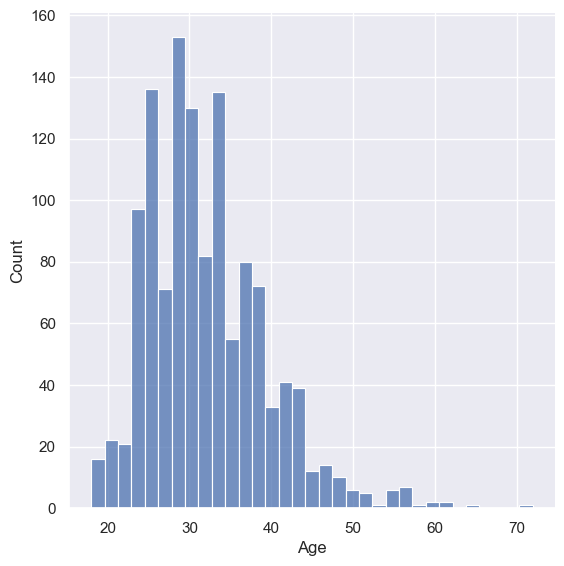

In [11]:
%matplotlib inline   
import seaborn as sns 
sns.set(color_codes=True) 
plot = sns.displot(df.Age.dropna()) 
plot.figure.set_size_inches(6,6) 

## Кодирование данных
Многие алгоритмы машинного обучения ожидают числовые входные данные, поэтому нам нужно выяснить способ представления наших категориальных данных численным образом.

Одним из решений этого было бы произвольное присвоение числового значения для каждой категории и отображение набора данных из исходных категорий в каждое соответствующее число. Например, давайте посмотрим на столбец «leave» (как легко вам взять отпуск по болезни для состояния психического здоровья?) В нашем наборе данных.

In [12]:
df['leave'].value_counts(dropna=False)

Don't know            563
Somewhat easy         266
Very easy             206
Somewhat difficult    126
Very difficult         98
Name: leave, dtype: int64

Для кодирования этих данных, сопоставим каждое значение с числом.

In [13]:
df['leave'] = df['leave'].map({'Very difficult': 0, 
                               'Somewhat difficult': 1, 
                               'Don\'t know': 2, 
                               'Somewhat easy': 3,
                               'Very easy': 4}) 
df.head()

,Timestamp,Age,Gender,Country,state,self_employed,family_history,treatment,work_interfere,no_employees,...,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,comments
0,2014-08-27 11:29:31,37.0,Female,United States,IL,NaN,No,Yes,Often,6-25,...,3,No,No,Some of them,Yes,No,Maybe,Yes,No,NaN
1,2014-08-27 11:29:37,44.0,Male,United States,IN,NaN,No,No,Rarely,More than 1000,...,2,Maybe,No,No,No,No,No,Don't know,No,NaN
2,2014-08-27 11:29:44,32.0,Male,Canada,NaN,NaN,No,No,Rarely,6-25,...,1,No,No,Yes,Yes,Yes,Yes,No,No,NaN
3,2014-08-27 11:29:46,31.0,Male,United Kingdom,NaN,NaN,Yes,Yes,Often,26-100,...,1,Yes,Yes,Some of them,No,Maybe,Maybe,No,Yes,NaN
4,2014-08-27 11:30:22,31.0,Male,United States,TX,NaN,No,No,Never,100-500,...,2,No,No,Some of them,Yes,Yes,Yes,Don't know,No,NaN


Этот процесс известен как Label Encoding и sklearn может сделать это за нас.

In [14]:
from sklearn import preprocessing 
label_encoder = preprocessing.LabelEncoder() 
label_encoder.fit(df['leave']) 
label_encoder.transform(df['leave']) 
df.head()

,Timestamp,Age,Gender,Country,state,self_employed,family_history,treatment,work_interfere,no_employees,...,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,comments
0,2014-08-27 11:29:31,37.0,Female,United States,IL,NaN,No,Yes,Often,6-25,...,3,No,No,Some of them,Yes,No,Maybe,Yes,No,NaN
1,2014-08-27 11:29:37,44.0,Male,United States,IN,NaN,No,No,Rarely,More than 1000,...,2,Maybe,No,No,No,No,No,Don't know,No,NaN
2,2014-08-27 11:29:44,32.0,Male,Canada,NaN,NaN,No,No,Rarely,6-25,...,1,No,No,Yes,Yes,Yes,Yes,No,No,NaN
3,2014-08-27 11:29:46,31.0,Male,United Kingdom,NaN,NaN,Yes,Yes,Often,26-100,...,1,Yes,Yes,Some of them,No,Maybe,Maybe,No,Yes,NaN
4,2014-08-27 11:30:22,31.0,Male,United States,TX,NaN,No,No,Never,100-500,...,2,No,No,Some of them,Yes,Yes,Yes,Don't know,No,NaN


Проблема с этим подходом заключается в том, что вы вводите порядок, который может отсутствовать в исходных данных. В нашем случае можно утверждать, что данные являются ранжированными («Very difficult» меньше «Somewhat difficult», который меньше «Very easy», который меньше «Somewhat easy»), но в большинстве своем категориальные данные не имеют порядка. Например, если у вас есть признак обозначающий вид животного, зачастую высказывание кошка больше собаки не имеет смысла. Опасность кодирования меток заключается в том, что ваш алгоритм может научиться отдавать предпочтение собак, кошкам из-за искусственных порядковых значений, введенных вами во время кодирования.

Общим решением для кодирования номинальных данных является **one-hot-encoding.**

Вместо того, чтобы заменять категориальное значение на числовое значение (кодирование меток), как показано ниже
- id	type	numerical
- 1	cat	1
- 2	dog	2
- 3	snake	3
- 4	cat	1
- 5	dog	2
- 6	turtle	4
- 7	dog	2

Вместо этого мы создаем столбец для каждого значения и используем 1 и 0 для обозначения выражения каждого значения. Эти новые столбцы часто называются фиктивными переменными.

- id	type	is_cat	is_dog	is_snake	is_turtle
- 1	cat	1	0	0	0
- 2	dog	0	1	0	0
- 3	snake	0	0	1	0
- 4	cat	1	0	0	0
- 5	dog	0	1	0	0
- 6	turle	0	0	0	1
- 7	dog	0	1	0	0

Выполним one-hot-encoding непосредственно в Pandas.

In [15]:
# Using Pandas 
import pandas as pd 
pd.get_dummies(df, columns=['leave']).head()
df = pd.get_dummies(df,prefix=['leave'], columns = ['leave'], drop_first=True)
df.head()

,Timestamp,Age,Gender,Country,state,self_employed,family_history,treatment,work_interfere,no_employees,...,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,comments,leave_1,leave_2,leave_3,leave_4
0,2014-08-27 11:29:31,37.0,Female,United States,IL,NaN,No,Yes,Often,6-25,...,Yes,No,Maybe,Yes,No,NaN,0,0,1,0
1,2014-08-27 11:29:37,44.0,Male,United States,IN,NaN,No,No,Rarely,More than 1000,...,No,No,No,Don't know,No,NaN,0,1,0,0
2,2014-08-27 11:29:44,32.0,Male,Canada,NaN,NaN,No,No,Rarely,6-25,...,Yes,Yes,Yes,No,No,NaN,1,0,0,0
3,2014-08-27 11:29:46,31.0,Male,United Kingdom,NaN,NaN,Yes,Yes,Often,26-100,...,No,Maybe,Maybe,No,Yes,NaN,1,0,0,0
4,2014-08-27 11:30:22,31.0,Male,United States,TX,NaN,No,No,Never,100-500,...,Yes,Yes,Yes,Don't know,No,NaN,0,1,0,0


## Нормализация тренировочных данных
На этом этапе мы успешно очистили наши данные и превратили их в форму, которая подходит для алгоритмов машинного обучения. Однако на данном этапе мы должны рассмотреть вопрос о том, полезен ли какой-либо метод нормализации данных для нашего алгоритма. Это зависит от данных и алгоритма, который мы планируем реализовать.

ML алгоритмы, которые требуют нормализации данных:
- Логистическая регрессия
- Метод опорных векторов
- Нейронная сеть
- PCA

ML алгоритмы, которые не требуют нормализации данных:
- Деревья принятия решений (и случайные леса)
- Градиентный бустинг
- Наивный Байес


**Примечание:** приведенные выше списки ни в коем случае не являются исчерпывающими, а просто служат примером.

Предположим, у вас есть набор данных с различными единицами: температура в Кельвине, относительная влажность и день года. Мы можем увидеть следующие диапазоны для каждой функции.
- Температура: от 270 K до 305 K
- Влажность: от 0 до 1 (т. е. Влажность 30%, равная 0,3)
- День года: от 0 до 365


Когда вы смотрите на эти значения, вы интуитивно нормализуете значения. Например, вы знаете, что увеличение на 0,5 (=50%) для влажности намного более значимо, чем увеличение на 0,5 для температуры. И если мы не будем нормализовать эти данные, наш алгоритм может научиться использовать температуру в качестве основного предиктора просто потому, что масштаб является наибольшим (и, следовательно, изменения в значениях температуры наиболее значительны для алгоритма). Нормализация данных позволяет всем признакам вносить одинаковый вклад (или, что более точно, позволяет добавлять признаки в зависимости от их важности, а не их масштаба).

## Алгоритм нормализации

Если вы используете такой инструмент, как градиентный спуск, для оптимизации алгоритма, нормализация данных позволяет проводить последовательное обновление весов во всех измерениях.

Первое изображение представляет две функции с разными шкалами, в то время как последняя представляет собой нормализованное пространство признаков. Оптимизация градиентным спуском в первом случае может занять большее количество времени и в конечном итоге не прийти к минимуму.
![Наискорейший спуск](img/20b0e3520bfa7d69d9bbbcfdb9d07f56.png)
Существует несколько различных методов нормализации данных, самые популярные из них:
- Нормализация Min-max устанавливает наименьшее наблюдаемое значение равным 0, а наибольшее наблюдаемое значение — 1.
![Нормализация Min-max](img/main-qimg-0d692d88876aeb26b1f1a578d1c5a94e.png)
- Нормализация на стандартное отклонение.
![Нормализация на стандартное отклонение](img/QiV53.jpg)


In [16]:
# Feature scaling with StandardScaler 
from sklearn.preprocessing import StandardScaler
scaled_features = df.select_dtypes(include=['number'])
col_names = scaled_features.columns
features = scaled_features[col_names]
scaler = StandardScaler().fit(features.values)
features = scaler.transform(features.values)


scale_features_std = StandardScaler() 
features_train = scale_features_std.fit_transform(features) 
features_test = scale_features_std.transform(features) 

# Feature scaling with MinMaxScaler 
from sklearn.preprocessing import MinMaxScaler 
scale_features_mm = MinMaxScaler() 
features_train = scale_features_mm.fit_transform(features_train) 
features_test = scale_features_mm.transform(features_test) 

Несколько замечаний по этой реализации:
На практике вы можете выбрать только определенные столбцы. Например, вам не нужно нормализовать фиктивные переменные из one-hot-encoding.

Разделение данных для обучения и тестирования
Разделение данных на две подвыборки
Одной из последних вещей, которые нам нужно будет сделать, чтобы подготовить данные для обучения, является разделение данных на обучающую и тестовую выборку. Выделение тестовой выборки необходимо для понимания того, что мы обучили алгоритм в достаточной степени (не произошло переобучение или недообучение)
 

 

Разделение данных на три подвыборки
Можно пойти дальше и разделять данные на три подмножества: обучение, валидация и отложенная выборка. Данные обучения используются для «обучения» модели, данные валидации используются для поиска лучшей архитектуры модели, а отложенная выборка зарезервирована для финальной оценки нашей модели. При построении модели нам часто дают выбор в отношении общего дизайна модели; данные валидации позволяют нам оценивать несколько проектов в поисках лучшего дизайна, но при этом мы «подгоняем» дизайн нашей модели по этому подмножеству. Таким образом, тестовые данные по-прежнему полезны при определении того, насколько хорошо наша модель будет обобщать то, чему она научилась для новых данных.

In [18]:
from sklearn.model_selection import train_test_split
features_train, features_test, labels_train, labels_test = train_test_split(features, labels, test_size=0.2, random_state = 0)

## Разделение данных на три подвыборки
Можно пойти дальше и разделять данные на три подмножества: обучение, валидация и отложенная выборка. Данные обучения используются для «обучения» модели, данные валидации используются для поиска лучшей архитектуры модели, а отложенная выборка зарезервирована для финальной оценки нашей модели. При построении модели нам часто дают выбор в отношении общего дизайна модели; данные валидации позволяют нам оценивать несколько проектов в поисках лучшего дизайна, но при этом мы «подгоняем» дизайн нашей модели по этому подмножеству. Таким образом, тестовые данные по-прежнему полезны при определении того, насколько хорошо наша модель будет обобщать то, чему она научилась для новых данных.